Part I: A photo booth application

Recreate the OpenCV logo using OpenCV drawing functions only (e.g., cv2.circle, cv2.line, etc.).

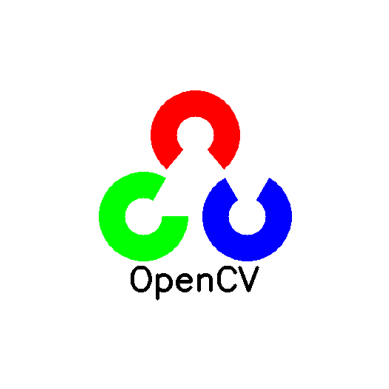

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a white background
image = np.ones((500, 500, 3), dtype=np.uint8) * 255

# Draw the three ellipses (circles with part missing for the look)
cv2.ellipse(image, (250, 170), (60, 60), 0, 130, 410, (0, 0, 255), -1)    # Red 
cv2.ellipse(image, (180, 280), (60, 60), 0, 0, 300, (0, 255, 0), -1)   # Green 
cv2.ellipse(image, (320, 280), (60, 60), 0, -60, 240, (255, 0, 0), -1)   # Blue

# Add inner white circles 
cv2.circle(image, (250, 170), 25, (255, 255, 255), -1)
cv2.circle(image, (180, 280), 25, (255, 255, 255), -1)
cv2.circle(image, (320, 280), 25, (255, 255, 255), -1)

# Add the text "OpenCV"
cv2.putText(image, "OpenCV", (160, 380), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 4)

# Convert to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show using matplotlib
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


Part II: Image Arithmetic

Write a Python script to manually blend two images using NumPy operations.

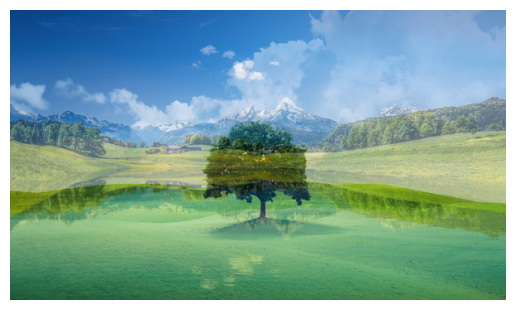

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your two images
img1 = cv2.imread("image1.jpg")
img2 = cv2.imread("image2.jpg")

# Resize them to the same size if needed
height = min(img1.shape[0], img2.shape[0])
width = min(img1.shape[1], img2.shape[1])
img1 = cv2.resize(img1, (width, height))
img2 = cv2.resize(img2, (width, height))

# Alpha value between 0 and 1
alpha = 0.5

# Manual blend using numpy
blend = (1 - alpha) * img1 + alpha * img2
blend = blend.astype(np.uint8)

# Save the result
cv2.imwrite("manual_blend.jpg", blend)

# Display the result using matplotlib
blend_rgb = cv2.cvtColor(blend, cv2.COLOR_BGR2RGB)
plt.imshow(blend_rgb)
plt.axis("off")
plt.show()


Part II: Image Arithmetic

Design a modular photo editing application in Python using OpenCV and NumPy. The app should allow
users to load an image and apply a sequence of processing steps interactively through a menu interface.

In [ ]:
import cv2
import numpy as np

# Operation Functions 

def adjust_brightness(img, value):
    return cv2.convertScaleAbs(img, beta=value)

def adjust_contrast(img, factor):
    return cv2.convertScaleAbs(img, alpha=factor)

def convert_to_grayscale(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

def add_padding(img, size, border_type):
    types = {
        'constant': cv2.BORDER_CONSTANT,
        'reflect': cv2.BORDER_REFLECT,
        'replicate': cv2.BORDER_REPLICATE
    }
    return cv2.copyMakeBorder(img, size, size, size, size, types.get(border_type, cv2.BORDER_CONSTANT))

def apply_threshold(img, thresh_type, value):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mode = cv2.THRESH_BINARY if thresh_type == "binary" else cv2.THRESH_BINARY_INV
    _, thresh = cv2.threshold(gray, value, 255, mode)
    return cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)

def blend_images(img1, img2_path, alpha):
    img2 = cv2.imread(img2_path)
    if img2 is None:
        print("Failed to load second image.")
        return img1
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    beta = 1.0 - alpha
    return cv2.addWeighted(img1, alpha, img2, beta, 0)

# Helper Display

def show_image(img, title="Image"):
    cv2.destroyAllWindows()
    cv2.imshow(title, img)
    print(f"Press any key in the '{title}' window to continue...")
    cv2.waitKey(0)  # Wait until a key is pressed
    cv2.destroyAllWindows()


# Main App 

def main():
    path = input("Enter path to the image file: ").strip()
    image = cv2.imread(path)
    if image is None:
        print("Failed to load image.")
        return

    history = [image.copy()]
    show_image(image, "Preview")

    while True:
        print("""
==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding
5. Apply Thresholding
6. Blend with Another Image
7. Undo Last Operation
8. Save Image and Exit
        """)

        choice = input("Choose an option: ")

        if choice == "1":
            val = int(input("Enter brightness adjustment (-100 to 100): "))
            new_img = adjust_brightness(image, val)

        elif choice == "2":
            factor = float(input("Enter contrast factor (0.0 to 3.0): "))
            new_img = adjust_contrast(image, factor)

        elif choice == "3":
            new_img = convert_to_grayscale(image)

        elif choice == "4":
            size = int(input("Enter padding size (px): "))
            btype = input("Border type (constant/reflect/replicate): ")
            new_img = add_padding(image, size, btype)

        elif choice == "5":
            mode = input("Threshold type (binary/inverse): ").strip()
            value = int(input("Enter threshold value (0-255): "))
            new_img = apply_threshold(image, mode, value)

        elif choice == "6":
            path2 = input("Enter second image path: ")
            alpha = float(input("Enter alpha (0.0 to 1.0): "))
            new_img = blend_images(image, path2, alpha)

        elif choice == "7":
            if len(history) > 1:
                history.pop()
                image = history[-1].copy()
                print("Undone.")
                show_image(image, "Preview")
                continue
            else:
                print("Nothing to undo.")
                continue

        elif choice == "8":
            filename = input("Enter filename to save (e.g., result.jpg): ")
            cv2.imwrite(filename, image)
            print("Image saved.")
            break

        else:
            print("Invalid choice.")
            continue

        image = new_img
        history.append(image.copy())
        show_image(image, "Preview")

    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()



==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding
5. Apply Thresholding
6. Blend with Another Image
7. Undo Last Operation
8. Save Image and Exit
        

==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding
5. Apply Thresholding
6. Blend with Another Image
7. Undo Last Operation
8. Save Image and Exit
        

==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding
5. Apply Thresholding
6. Blend with Another Image
7. Undo Last Operation
8. Save Image and Exit
        

==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding
5. Apply Thresholding
6. Blend with Another Image
7. Undo Last Operation
8. Save Image and Exit
        
Image saved.


Part IV:

Academic integrity Policy

I, Lance Curio, declare that I have read and understood the Academic Integrity Policy.